##### 필요 라이브러리

 - java 1.7 이상필요(SQL 수업시 이미 설치완료됨 ) 
 - pip install tensorflow 텐서플로우 
 - pip install gensim 젠심 
 - pip install scikit-learn 
 - pip install jupyter notebook
 - pip install nltk 
    -> python 접속 후 
     - import nltk  
     - nltk.download() 
    : 약 1기가정도 데이터 다운로드 화면 나옴 

 - pip install kss (한국어 문장토큰화)


- pip install konlpy
  - 형태소 분석기
     - from konlpy.tag import Okt
     - from konlpy.tag import Kkma

     - okt = Okt() 
     - kkma = Kkma()

    ** mecab 형태소 분석기가 성능 및 처리속도에서 최고이나 설치하기 난해함 

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter 
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'konlpy'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 네이버 상품 리뷰 데이터
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

In [ ]:
total_data = pd.read_table('ratings_total.txt', names=['ratings' , 'reviews'])
print('전체리뷰갯수 : ' , len(total_data))

In [2]:
total_data[:5]

NameError: name 'total_data' is not defined

In [11]:
total_data['label'] = np.select([total_data.ratings > 3 ] ,  [1] , default = 0 ) 
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
199995,2,장마라그런가!!! 달지않아요,0
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,5,넘이쁘고 쎄련되보이네요~,1


In [12]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [13]:
total_data.drop_duplicates(subset=['reviews'], inplace = True )
print('총 샘플의 수  : ' , len(total_data))

 # reviews 열에서 중복인 내용이 있다면 중복 제거

총 샘플의 수  :  199908


In [14]:
print(total_data.isnull().values.any())

False


In [15]:
train_data, test_data = train_test_split(total_data, test_size= 0.25 , random_state = 42 )
print( '훈련용 리뷰의 개수 : ' , len(train_data))
print('테스트용 리뷰의 개수 : ' , len(test_data))

훈련용 리뷰의 개수 :  149931
테스트용 리뷰의 개수 :  49977


<AxesSubplot:>

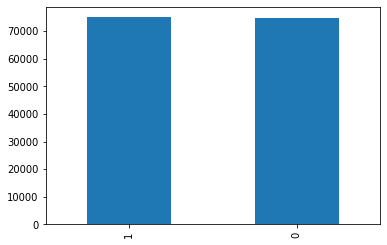

In [16]:
# 부정리뷰 감정리뷰 데이터셋이 고르게 분포함을 확인 
train_data['label'].value_counts().plot(kind = 'bar')


In [17]:
# 데이터 정제 정규식 한글제외한 나머지 모두 제거 

In [18]:
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-하-ㅣ가-힣]", "")

C:\Users\crid2\AppData\Local\Temp\ipykernel_9696\492259256.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-하-ㅣ가-힣]", "")


In [19]:
train_data['reviews'].replace('', np.nan , inplace=True)
print(train_data.isnull().sum())

ratings    0
reviews    0
label      0
dtype: int64


In [20]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))




전처리 후 테스트용 샘플의 개수 : 49977


C:\Users\crid2\AppData\Local\Temp\ipykernel_9696\2390753744.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [21]:
sample_train = train_data[0:5000]
sample_test = test_data[0:1000]

In [38]:
### 토큰화

In [39]:
# 형태소 처리 라이브러리 정의 
okt =  Okt()


In [40]:
print(okt.morphs('와 이런것도 상품이라고 하냐 차라리 내가 붕어빵을 만든는것이 훨씬 낫겠네!!!'))

['와', '이런', '것', '도', '상품', '이라고', '하냐', '차라리', '내', '가', '붕어빵', '을', '만든는것이', '훨씬', '낫겠네', '!!!']


In [41]:
# 불용어 : 추가시 리스트에 추가
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [42]:
sample_train['tokenized'] = sample_train['reviews'].apply(okt.morphs)
sample_train['tokenized'] = sample_train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

C:\Users\crid2\AppData\Local\Temp\ipykernel_9696\4293915352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_train['tokenized'] = sample_train['reviews'].apply(okt.morphs)
C:\Users\crid2\AppData\Local\Temp\ipykernel_9696\4293915352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_train['tokenized'] = sample_train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [43]:
sample_test['tokenized'] = sample_test['reviews'].apply(okt.morphs)
sample_test['tokenized'] = sample_test['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

C:\Users\crid2\AppData\Local\Temp\ipykernel_9696\313664598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_test['tokenized'] = sample_test['reviews'].apply(okt.morphs)
C:\Users\crid2\AppData\Local\Temp\ipykernel_9696\313664598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_test['tokenized'] = sample_test['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [44]:
## 전체데이터 렉걸려서 처리 안됨 아니면 최소 2시간이상 시간 소요추정

# train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
# train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [45]:
# test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
# test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [46]:
# 단어 길이 및 분포 확인하기 

In [47]:
negative_words = np.hstack(sample_train[sample_train.label == 0]['tokenized'].values)
positive_words = np.hstack(sample_train[sample_train.label == 1]['tokenized'].values)

In [48]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('요', 478), ('너무', 412), ('배송', 334), ('그냥', 243), ('로', 199), ('했는데', 191), ('생각', 172), ('별로', 170), ('하고', 165), ('ㅠㅠ', 163), ('잘', 161), ('제품', 156), ('안', 156), ('못', 147), ('으로', 143), ('좀', 140), ('보다', 139), ('구매', 136), ('만', 134), ('같아요', 130)]


In [49]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('좋아요', 471), ('배송', 396), ('재구매', 270), ('구매', 260), ('너무', 251), ('잘', 250), ('요', 239), ('가격', 190), ('으로', 138), ('제품', 138), ('좋네요', 133), ('로', 128), ('같아요', 128), ('빠르고', 124), ('ㅎㅎ', 124), ('사용', 116), ('보다', 115), ('만족합니다', 109), ('생각', 109), ('주문', 108)]


In [50]:
# 시각화 

긍정 리뷰의 평균 길이 : 10.369967793880837
부정 리뷰의 평균 길이 : 13.962639109697934


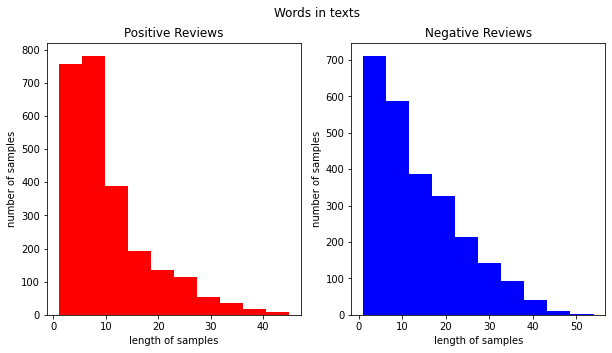

In [51]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = sample_train[sample_train['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = sample_train[sample_train['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [52]:
X_train = sample_train['tokenized'].values
y_train = sample_train['label'].values
X_test = sample_test['tokenized'].values
y_test = sample_test['label'].values

In [53]:
# 정수 인코딩 


In [54]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [55]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 14438
등장 빈도가 1번 이하인 희귀 단어의 수: 9118
단어 집합에서 희귀 단어의 비율: 63.152791245324835
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 14.974790191988701


In [56]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 5322


In [57]:
## 재 토큰화 
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [58]:
print(X_train[:3])

[[35, 900, 317, 1, 1985, 80, 3, 194, 102, 95, 331, 3, 1, 452, 3, 25, 26, 2479, 833, 602, 66, 5], [1435, 1119, 2480, 2481, 2482, 236, 1, 1], [12, 332, 1, 287, 1264, 528, 200, 1, 640, 37, 1, 1654, 189, 528, 1, 1, 1120, 3356, 1986, 3, 64, 16, 1]]


In [59]:
print(X_test[:3])

[[4, 1, 1966, 4680, 144, 4145], [236, 1, 26, 1], [2, 679, 10, 91, 67, 73, 17, 561, 135, 1, 69, 1, 6, 229]]


리뷰의 최대 길이 : 54
리뷰의 평균 길이 : 12.1778


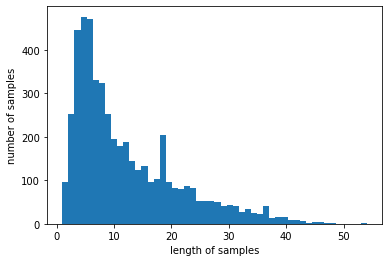

In [60]:
# 패딩 

print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [61]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [62]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 100.0


In [63]:
# 리뷰길이 80으로 패딩 

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [64]:
# 자연어 딥러닝 모델 

In [65]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [66]:
# 자연어 모델 

In [67]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/20
60/63 [===========================>..] - ETA: 0s - loss: 0.5598 - acc: 0.7195
Epoch 00001: val_acc improved from -inf to 0.78900, saving model to best_model.h5
63/63 [==============================] - 5s 22ms/step - loss: 0.5550 - acc: 0.7230 - val_loss: 0.4442 - val_acc: 0.7890
Epoch 2/20
61/63 [============================>.] - ETA: 0s - loss: 0.3182 - acc: 0.8750
Epoch 00002: val_acc improved from 0.78900 to 0.85000, saving model to best_model.h5
63/63 [==============================] - 1s 14ms/step - loss: 0.3195 - acc: 0.8748 - val_loss: 0.3600 - val_acc: 0.8500
Epoch 3/20
63/63 [==============================] - ETA: 0s - loss: 0.2285 - acc: 0.9168
Epoch 00003: val_acc did not improve from 0.85000
63/63 [==============================] - 1s 13ms/step - loss: 0.2285 - acc: 0.9168 - val_loss: 1.2977 - val_acc: 0.6360
Epoch 4/20
63/63 [==============================] - ETA: 0s - loss: 0.1884 - acc: 0.9300
Epoch 00004: val_acc improved from 0.85000 to 0.85400, saving model

In [68]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

32/32 [==============================] - 1s 5ms/step - loss: 0.4291 - acc: 0.8340

 테스트 정확도: 0.8340


In [69]:
## 리뷰예측하기
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [110]:
sentiment_predict('이 상품 2조가 만들어서 좋아요... 저는 강추합니다. 대박')

99.80% 확률로 긍정 리뷰입니다.


In [111]:
sentiment_predict('중국짝퉁으로 후려치는 물건 사지마세요')

99.93% 확률로 부정 리뷰입니다.


In [112]:
sentiment_predict('굿굿 2조쇼핑몰 강추')

97.76% 확률로 긍정 리뷰입니다.


In [113]:
sentiment_predict(' 2조에서 만들었다고했는데 다른데서 만듬 사기꾼인가')

83.03% 확률로 부정 리뷰입니다.


In [104]:
sentiment_predict('배송빨라서 맘에 들어요 ㅎ')

98.79% 확률로 긍정 리뷰입니다.


In [114]:
reviews = str(input('리뷰를 입력하세요 : '))
sentiment_predict(reviews)

리뷰를 입력하세요 : 나이스 굿 베리나이스
99.71% 확률로 긍정 리뷰입니다.
